






<h2 id='part1'> Project 1</h2>

First, let's read in the data and necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import ImputingValues as t
import seaborn as sns
%matplotlib inline


df = pd.read_csv('./survey_results_public.csv')

## Showing the data
df.head(5)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<h3 id='q1'> Dataframe statistics </h3>

Number of rows and columns in this dataset.

In [3]:
num_rows = df.shape[0] # Number of rows in the dataset
num_cols = df.shape[1] # Number of columns in the dataset

print ('rows:', num_rows)
print ('columns:', num_cols)

rows: 19102
columns: 154


### Remote Work

Provide a pandas series of the different **HomeRemote** status values in the dataset.  Store this pandas series in **remote_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each status.

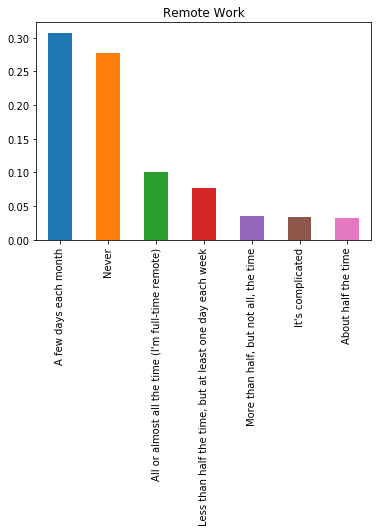

In [4]:
remote_vals = df.HomeRemote.value_counts()#Provide a pandas series of the counts for each HomeRemote status

# The below should be a bar chart of the proportion of individuals in your remote_vals
# if it is set up correctly.

(remote_vals/df.shape[0]).plot(kind="bar");
plt.title("Remote Work");

### Country

Provide a pandas series of the different **Country** values in the dataset.  Store this pandas series in **count_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each country.

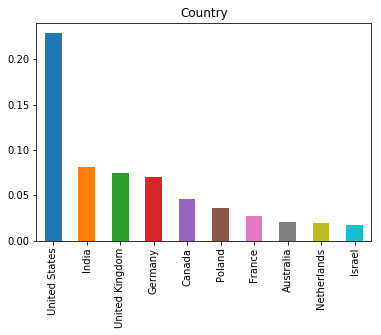

In [5]:
count_vals = df.Country.value_counts()#Provide a pandas series of the counts for each Country

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Country");

### Job Satisfaction Rating

Provide a pandas series of the different **Job Satisfaction Rating** values in the dataset.  Store this pandas series in **satisfaction_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each country.

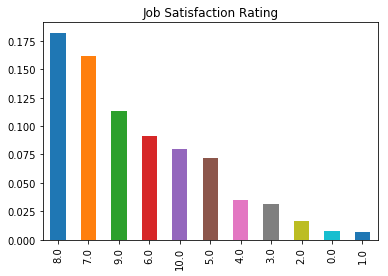

In [6]:
satisfaction_vals = df.JobSatisfaction.value_counts()#Provide a pandas series of the counts 


(satisfaction_vals/df.shape[0]).plot(kind="bar");
plt.title("Job Satisfaction Rating");

### Quesion 3: How well can we predict an individual's HoursPerWeek? What aspects correlate well to HoursPerWeek?

#### The purpose of this section is to predict HoursPerWeek by using both numerical features and categorical features

In [2]:
df = pd.read_csv('./survey_results_public.csv')

## Showing the data
df.head(5)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Dropping where the HoursPerWeek has missing values
df  = df.dropna(subset=['HoursPerWeek'], axis=0)

In [4]:
# a dataframe only holding the categorical columns
cat_df = df.select_dtypes(include=['object']) 
# Number of categorical variables
cat_df.shape[1]

147

### We chose JobSeekingStatus, EmploymentStatus and HomeRemote columns are important categorical features to predict HoursPerWeek

In [5]:
cat_df_JobSeekingStatus = cat_df[["JobSeekingStatus"]]
np.sum(cat_df_JobSeekingStatus.isnull())/cat_df.shape[0]    ## about 28% missining values

JobSeekingStatus    0.0
dtype: float64

In [6]:
cat_df_JobSeekingStatus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7721 entries, 0 to 19096
Data columns (total 1 columns):
JobSeekingStatus    7721 non-null object
dtypes: object(1)
memory usage: 120.6+ KB


In [7]:
cat_df_EmploymentStatus = cat_df[["EmploymentStatus"]]
np.sum(cat_df_EmploymentStatus.isnull())/cat_df.shape[0]    ## about 0% missining values

EmploymentStatus    0.0
dtype: float64

In [8]:
cat_df_EmploymentStatus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7721 entries, 0 to 19096
Data columns (total 1 columns):
EmploymentStatus    7721 non-null object
dtypes: object(1)
memory usage: 120.6+ KB


In [9]:
cat_df_HomeRemote = cat_df[["HomeRemote"]]
np.sum(cat_df_HomeRemote.isnull())/cat_df.shape[0]    ## about 14% missining values

HomeRemote    0.119156
dtype: float64

In [10]:
cat_df_HomeRemote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7721 entries, 0 to 19096
Data columns (total 1 columns):
HomeRemote    6801 non-null object
dtypes: object(1)
memory usage: 120.6+ KB


### Handling categorical data

In [11]:
cat_df_features = cat_df[["JobSeekingStatus","EmploymentStatus","HomeRemote"]]
cat_cols_lst = cat_df_features.columns

In [12]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [13]:
df_trained = df[["JobSeekingStatus","EmploymentStatus","HomeRemote",'JobSatisfaction','HoursPerWeek','Salary','StackOverflowSatisfaction', 'CareerSatisfaction']]
#df_trained = df[["HomeRemote",'JobSatisfaction','HoursPerWeek','Salary','StackOverflowSatisfaction', 'CareerSatisfaction']]

## Cal function to create dummy
df_cat_dummy = create_dummy_df(df_trained, cat_cols_lst, dummy_na=False) 
df_cat_dummy.head()

,JobSatisfaction,HoursPerWeek,Salary,StackOverflowSatisfaction,CareerSatisfaction,JobSeekingStatus_I am not interested in new job opportunities,"JobSeekingStatus_I'm not actively looking, but I am open to new opportunities",EmploymentStatus_Employed part-time,EmploymentStatus_I prefer not to say,"EmploymentStatus_Independent contractor, freelancer, or self-employed","EmploymentStatus_Not employed, and not looking for work","EmploymentStatus_Not employed, but looking for work",EmploymentStatus_Retired,HomeRemote_About half the time,HomeRemote_All or almost all the time (I'm full-time remote),HomeRemote_It's complicated,"HomeRemote_Less than half the time, but at least one day each week","HomeRemote_More than half, but not all, the time",HomeRemote_Never
0,NaN,0.0,NaN,9.0,NaN,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,3.0,5.0,NaN,10.0,6.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,NaN,0.0,NaN,6.0,NaN,0,1,0,0,0,1,0,0,0,0,0,0,0,0
6,6.0,1.0,NaN,8.0,7.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,7.0,1.0,NaN,7.0,7.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


### Handling missing data


In [14]:
# Mean function to impute missing values
fill_mean = lambda col: col.fillna(col.mean()) 

#Fill all missing values with the mean of the column
fill_df = df_cat_dummy.apply(fill_mean, axis=0) 
fill_df.head()

,JobSatisfaction,HoursPerWeek,Salary,StackOverflowSatisfaction,CareerSatisfaction,JobSeekingStatus_I am not interested in new job opportunities,"JobSeekingStatus_I'm not actively looking, but I am open to new opportunities",EmploymentStatus_Employed part-time,EmploymentStatus_I prefer not to say,"EmploymentStatus_Independent contractor, freelancer, or self-employed","EmploymentStatus_Not employed, and not looking for work","EmploymentStatus_Not employed, but looking for work",EmploymentStatus_Retired,HomeRemote_About half the time,HomeRemote_All or almost all the time (I'm full-time remote),HomeRemote_It's complicated,"HomeRemote_Less than half the time, but at least one day each week","HomeRemote_More than half, but not all, the time",HomeRemote_Never
0,6.436246,0.0,53965.661454,9.0,7.056479,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,3.000000,5.0,53965.661454,10.0,6.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,6.436246,0.0,53965.661454,6.0,7.056479,0,1,0,0,0,1,0,0,0,0,0,0,0,0
6,6.000000,1.0,53965.661454,8.0,7.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,7.000000,1.0,53965.661454,7.0,7.000000,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [15]:
#np.sum(fill_df.isnull())/fill_df.shape[0]  

In [16]:
#Split into target and independent variables
X = fill_df.drop(['HoursPerWeek'], axis=1)
y = fill_df['HoursPerWeek']

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) 

#Fitting the model
lm_model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

#### We fitted a linear regression model with L2 and L1 regularization to prevent overfitting problem and can interperate the relation between the taget variable and independent variables

In [18]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.1)
clf.fit(X_train, y_train)
#Predictting the target variables 
y_test_preds = clf.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)

#printting the len of y_test
length_y_test = len(y_test)

print("The r-squared score for our model is: ", rsquared_score, "for", length_y_test, "number of test data")

The r-squared score for our model is:  0.0989799132977 for 2317 number of test data


In [22]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.01)
clf.fit(X_train, y_train)
#Predictting the target variables 
y_test_preds = clf.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)

#printting the len of y_test
length_y_test = len(y_test)

print("The r-squared score for our model is: ", rsquared_score, "for", length_y_test, "number of test data")

The r-squared score for our model is:  0.0961797787407 for 2317 number of test data
